# Hyper Basis Function Models


### Table of Contents

#### Framing
a) <a href='#Learning as Hypersurface reconstruction'>Learning as Hypersurface reconstruction</a> 

b) <a href='#Approximating the Hypersurface'>Approximating the Hypersurface</a>

c) <a href='#Network representation of approximated Hypersurfaces'>Network representation of approximated Hypersurfaces</a>

#### Interpolation and Radial Basis Functions (RBFs)
a) <a href='#Interpolation Problem'>Interpolation Problem</a> 

b) <a href='#Radial Basis Functions (RBFs)'>Radial Basis Functions (RBFs)</a> 

c) <a href='#RBF approach to interpolation'>RBF approach to interpolation</a>

#### An example

a) <a href='#Loading and looking at data'>Loading and looking at data</a> 

b) <a href='#Linear RBF interpolation'>Linear RBF interpolation</a> 

c) <a href='#Multiquadratic RBF interpolation'>Multiquadratic RBF interpolation</a> 



## 1) Framing

In the absence of a complete section on this I'll get down the gist:

<a id='Learning as Hypersurface reconstruction'></a>

### Learning as Hypersurface reconstruction

a) TL/DR Allot of super relevent types of learning boil down to input-output mappings;

Lots of the learning that we do, as agents in the world (as humans, animals, plants, fungi, and bacteria are) can be described as learning a mapping from an input to an output space. The input could be sensory information and the output some behavior. Examples of such mappings include sensing a bad smell and exiting a room, or a plant leaning towards sunlight. The input can be sensory information and the output representational (learning new categories, recognizing new faces). The input and output both can be represntational. Many of the types of learning we do can be represented this way. 

b) Input to output mappings, when the output is a single dimension, is a question of hypersurface reconstruction

As a potentially important note I say hypersurface a bit lightly, I think it has a deeper meaning than I currently understand. I mean it as a surface in any number of dimensions that has the singular constraint of having a one dimensional output for any input vector of arbitrary dimension. Another note: the more broad context of multidimensional output spaces can be represented in tis framework as a collection of surfaces.

c) We want to able to generate mappings from sparse data

<a id='Approximating the Hypersurface'></a>

### Approximating the Hypersurface

a) Given sparse noisy data we want to try to estimate a point on a surface. This is an approximation problem.

Insert definition of approximation problem here

<a id='Network representation of approximated Hypersurfaces'></a>

### Network representation of approximated hypersurfaces

Many classical sollutions to the approximation problem can be represented by network.

Linear regression and spline interprolation (as exampels) can be represented by networks of one hidden layer. 



## 2) Interprolation and Radial Basis Functions 
This section is an interactive "playthrough" of the section of the same name of Piggio and Girosi's 1989 paper "A theory of Networks for Approximation and Learning" With some spinoffs.

<a id='Interpolation Problem'></a>

### Interpolation Problem

Given $N$ different points {$\vec{x_i} \in R^n | i = 1,...N$} and $N$ real numbers {$y_i \in R^n | i = 1,...N$} find a function $F$ from $R^n$ to $R$ satisfying the interpolation conditions:

$$
F(\vec{x_i}) = y_i, \ \ \ i = 1,...N
$$

(Poggio & Girosi 1989) 


Described in words, we want some function that can recreate our data but also generate guesses about points that we haven't seen before.

As a note: I can see no way for such a process to be possible in the case where two examples with identitical feature vectors yield conflicting label values. Indeed we will, at least in the case of the interprolation strategy we'll be looking at, where this situation leads to an attempt to invert a square matrix that has rank less than that of it's size! Edit: I'm less confident about this now, certainly if clusters of points very close together (or identical) will create regions in the H matrix that have similar (or identical) values, which could in principle decrease the rank. THis is all a bit fuzzy to me.

! I realize I've used the term rank. Given that I would like, ultimately, this to be accessible to anybody with high school or GED equivalent I need to link to a descriptive definition of rank

<a id='Radial Basis Functions (RBFs)'></a>

### Radial Basis Functions (RBFs) 

I'm going to give a basic and unsatisfying definition of Radial Basis Functions here. This is, largely, based out of my current limited understanding of what a radial basis function is. As such this definition is temporary, and only as descriptive as my understanding is deep.

The context: function $F$ is from a vector space of dimension $N$, the basis of the space being the set of functions 

$$\{h(||x-x_i||)|i = 1,...N\}$$

s.t. $h$ is a continuous funciton from $R^m \rightarrow R^n$ where $m>n$ & $||.||$ is the Euclidean norm. 
This $h$ is the <b><i>radial basis function</i></b>

Note here the relationship between the Euclidian Norm and $L2$ distance, where a difference in any dimension yields a non-zero value, and additional dimensions can only increase or unchange the value of h between two points

There are some constraints on the types of functions $h$ can be, and this is one area where my current understanding is quite lacking. So far as I can tell it boils down to the matrix $H$ that one gets out of $\{h(||x-x_i||)|i = 1,...N\}$ being invertible.

Some examples of valid radial basis functions are listed:

$$
h(r) = e^{-(\frac{r}{c})^2}\ \ \ (gaussian)
$$

$$
h(r) = \frac{1}{(c^2+r^2)^\alpha} \ \ \ \alpha>0
$$

$$
h(r) = (c^2+r^2)^\beta \ \ \ 0<\beta<1
$$

$$
h(r) = \sqrt{c^2 + r^2} \ \ \ (multiquadratic)
$$

$$
h(r) = r \ \ \ \ \ (linear)
$$

<a id='RBF approach to interpolation'></a>

### RBF approach to interpolation

A satisfying explanation of this, as with many things, is missing.

All I will say for now is the interpolation problem can be solved, given that $h(r)$ is a valid RBF, by setting our function $F$ to a linear combination of the RBFs that form the basis of our previously definied vector space 

$$
F(x) = \sum_{i=1}^N c_ih(||x-x_i||)
$$

Furthermore the unknown coefficients $c_i$ can be recovered by reimposing our interpolation conditions defined previously. Simply substituting those conditions into the above function yields a solvable system.

$$
y_j = \sum_{i=1}^N c_ih(||(x_j - x_i||) \ \ j=1,...,N
$$

By setting some definitions: $(y)_j = y_j; \ \ (c)_i = c_i;  \ \ (H)_{ij} = h(||x_j - x_i||)$ the system simplifies nicely:

$$
c = H^{-1}y
$$

### Network representation of RBF


## 3) An Example

<a id='Loading and looking at data'></a>

### Loading and looking at data
First we'll load some packages and data

In [6]:
%matplotlib inline 

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import math
from mpl_toolkits.mplot3d import Axes3D

num_examples = 100
test_examples = 100

california_housing_dataframe = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe = california_housing_dataframe.reindex( 
    np.random.permutation(california_housing_dataframe.index))

data_train = np.zeros([num_examples,3]) 
data_train[:,0] = california_housing_dataframe.median_house_value[0:(num_examples)].values # Median house value for household within a block ($1)
data_train[:,1] = california_housing_dataframe.population[0:(num_examples)].values # population in block
data_train[:,2] = california_housing_dataframe.median_income[0:(num_examples)].values # Median income for households within a block ($10k)


california_housing_dataframe = california_housing_dataframe.reindex( 
    np.random.permutation(california_housing_dataframe.index))
# I should be splitting the data into non-overlapping test and training examples, the only benefit of this is it allows some flexibility (if the training data set and the test data set together make up more than the total number of exampels I won't get an error here, I'll only get an error if either individually are too large)

data_test = np.zeros([test_examples,3]) 
data_test[:,0] = california_housing_dataframe.median_house_value[0:(test_examples)].values
data_test[:,1] = california_housing_dataframe.population[0:(test_examples)].values
data_test[:,2] = california_housing_dataframe.median_income[0:(test_examples)].values



Next lets see what we're working with

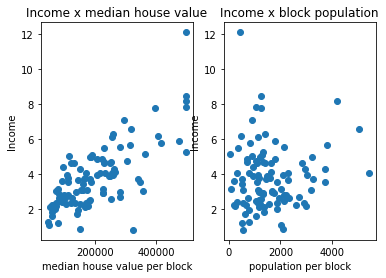

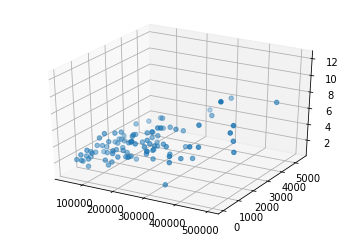

In [7]:
plt.subplot(1,2,1)
plt.scatter(data_train[:,0], data_train[:,2])
plt.xlabel('median house value per block') 
plt.ylabel('Income')
plt.title('Income x median house value')

plt.subplot(1,2,2)
plt.scatter(data_train[:,1], data_train[:,2])
plt.xlabel('population per block') 
plt.ylabel('Income')
plt.title('Income x block population')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_train[:,0],data_train[:,1],data_train[:,2])

plt.show()


As a note: Recall how we mentioned a limit of interprolation before (namely that two identical input vectors with different outputs would break our ability to perform interprolation). The distance between any two points in a feature space necesarally increases as we increase the dimensionality of that feature space. We can see this intuitively in the $R^1 \rightarrow R^2$ case but by simply looking at the definition of $L2$ distance we can see this extends to any increase in dimension (relevance of $L2$ distance will be made more clear when we talk about radial basis functions).

The following defines $L2$ distance between two vectors of length n $\vec{p}=(p_1,p_2,...,p_n)$ and $\vec{q}=(q_1,q_2,...,q_n)$
$$
\rho_{L2}(\vec{p},\vec{q}) = \sqrt{\sum_{i=1}^n(q_i-p_i)^2}
$$

<a id='Linear RBF interpolation'></a>

### Linear RBF interpolation

In [8]:
# Linear RBF interpolation (in 1D & 2D feature vectors)
# Next hopefully I'll add loss and comparison to simple linear regression
# Ultimately I want to have a switch-case here that allows users to choose their basis function. Ideally if they picked a paramterized basis they would be prompted to input paramters (or even better I guess the parameter space would be samples/explored)

# Median House value -> income
H_0 = np.zeros([num_examples,num_examples])

for i in range(num_examples):
    for j in range(num_examples):
        H_0[i,j] = (np.linalg.norm(data_train[j,0]-data_train[i,0]))

c_0 = np.matmul(np.linalg.inv(H_0),np.reshape(data_train[:,2],[num_examples,1]))

y_hats_test_linear_0 = np.zeros(test_examples)

for test_val in range(test_examples):
    temp = 0
    for node in range(num_examples):
        temp = temp + c_0[node]*np.linalg.norm(data_test[test_val,0]-data_train[node,0])
    y_hats_test_linear_0[test_val] = temp    
    

    
plt.subplot(1,3,1)
plt.scatter(data_train[:,0], data_train[:,2])
plt.xlabel('Median House value'); plt.ylabel('Income'); plt.title('Training data')
plt.subplot(1,3,2)    
plt.scatter(data_test[:,0], data_test[:,2])    
plt.xlabel('Median House value'); plt.ylabel('True Income'); plt.title('Test data')
plt.subplot(1,3,3)
plt.scatter(data_test[:,0], y_hats_test_linear_0)
plt.xlabel('Median House value'); plt.ylabel('Estimated Income (Linear)'); plt.title('Estimated Income')

plt.subplots_adjust(wspace = 0.5)
plt.show()

#Loss calculation
y_est = np.zeros([test_examples,1]); L2Loss = 0

for i in range(0,(test_examples)):
    L2Loss = L2Loss + (data_test[i,2]-(y_hats_test_linear_0[i]))**2
print("L2Loss = %s" %L2Loss)


LinAlgError: Singular matrix

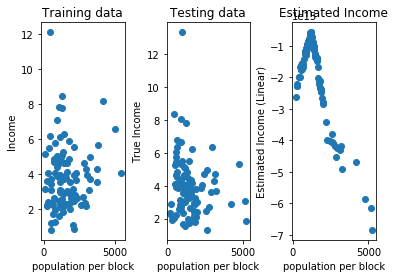

L2Loss = 5.505142084498822e+32


In [9]:
# Block Population -> income
H_1 = np.zeros([num_examples,num_examples])

for i in range(num_examples):
    for j in range(num_examples):
        H_1[i,j] = (np.linalg.norm(data_train[j,1]-data_train[i,1]))

c_1 = np.matmul(np.linalg.inv(H_1),np.reshape(data_train[:,2],[num_examples,1]))

y_hats_test_linear_1 = np.zeros(test_examples)

for test_val in range(test_examples):
    temp = 0
    for node in range(num_examples):
        temp = temp + c_1[node]*np.linalg.norm(data_test[test_val,1]-data_train[node,1])
    y_hats_test_linear_1[test_val] = temp    
    
plt.subplot(1,3,1)
plt.scatter(data_train[:,1], data_train[:,2])
plt.xlabel('population per block'); plt.ylabel('Income'); plt.title('Training data')
plt.subplot(1,3,2)
plt.scatter(data_test[:,1], data_test[:,2])
plt.xlabel('population per block'); plt.ylabel('True Income'); plt.title('Testing data')
plt.subplot(1,3,3)
plt.scatter(data_test[:,1], y_hats_test_linear_1)
plt.xlabel('population per block'); plt.ylabel('Estimated Income (Linear)'); plt.title('Estimated Income')

plt.subplots_adjust(wspace = 0.5)
plt.show()

#Loss calculation
y_est = np.zeros([test_examples,1]); L2Loss = 0

for i in range(0,(test_examples)):
    L2Loss = L2Loss + (data_test[i,2]-(y_hats_test_linear_1[i]))**2
print("L2Loss = %s" %L2Loss)

    

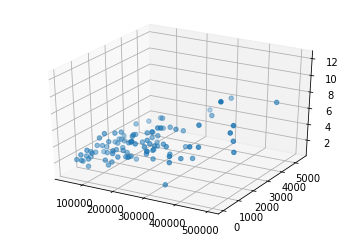

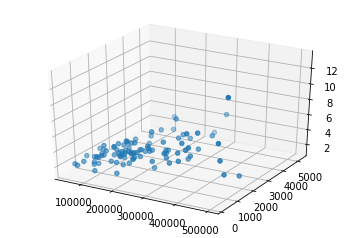

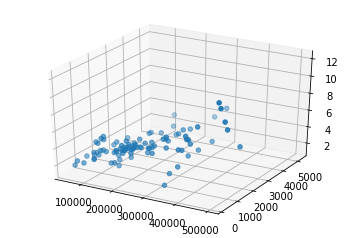

L2Loss = 232.04339850767585


In [10]:
 #Block Population*Population -> Income
    
H_01 = np.zeros([num_examples,num_examples])

for i in range(num_examples):
    for j in range(num_examples):
        H_01[i,j] = (np.linalg.norm(data_train[j,[0,1]]-data_train[i,[0,1]]))

c_01 = np.matmul(np.linalg.inv(H_01),np.reshape(data_train[:,2],[num_examples,1]))

y_hats_test_linear_01 = np.zeros(test_examples)

for test_val in range(test_examples):
    temp = 0
    for node in range(num_examples):
        temp = temp + c_01[node]*np.linalg.norm(data_test[test_val,[0,1]]-data_train[node,[0,1]])
    y_hats_test_linear_01[test_val] = temp   
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_train[:,0],data_train[:,1],data_train[:,2])
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_test[:,0],data_test[:,1],data_test[:,2])
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_test[:,0],data_test[:,1],y_hats_test_linear_01)
plt.show()

#Loss calculation
y_est = np.zeros([test_examples,1]); L2Loss = 0

for i in range(0,(test_examples)):
    L2Loss = L2Loss + (data_test[i,2]-(y_hats_test_linear_01[i]))**2
print("L2Loss = %s" %L2Loss)


In [80]:
california_housing_dataframe.shape

(17000, 9)

In [36]:
# multiquaradic (Population)
const = 10
H = np.zeros([num_examples,num_examples])

for i in range(num_examples):
    for j in range(num_examples):
        H[i,j] = math.sqrt((np.linalg.norm(data_train[j,1]-data_train[i,1]))**2 + const**2)

c = np.matmul(np.linalg.inv(H),np.reshape(data_train[:,2],[num_examples,1]))

y_hats_test_multiquad = np.zeros(test_examples)

for test_val in range(test_examples):
    temp = 0
    for node in range(num_examples):
        temp = temp + c[node]*math.sqrt(np.linalg.norm(data_test[test_val,1]-data_train[node,1])**2 + const**2)
    y_hats_test_multiquad[test_val] = temp  
    
    

In [38]:
# gauss (Population)

const = 10
H = np.zeros([num_examples,num_examples])

for i in range(num_examples):
    for j in range(num_examples):
        H[i,j] = math.exp(-(((np.linalg.norm(data_train[j,1]-data_train[i,1]))/const)**2))

c = np.matmul(np.linalg.inv(H),np.reshape(data_train[:,2],[num_examples,1]))

y_hats_test_gauss = np.zeros(test_examples)

for test_val in range(test_examples):
    temp = 0
    for node in range(num_examples):
        temp = temp + c[node]*math.exp(-(((np.linalg.norm(data_test[test_val,1]-data_train[node,1]))/const)**2))
    y_hats_test_gauss[test_val] = temp  
    

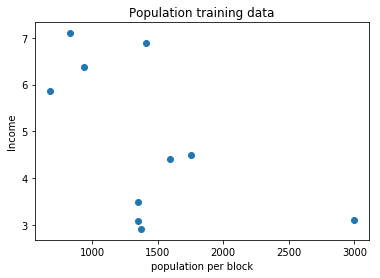

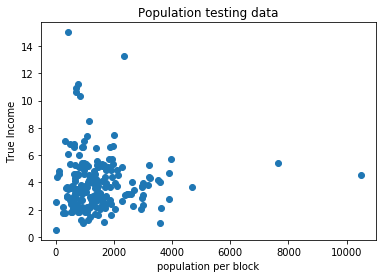

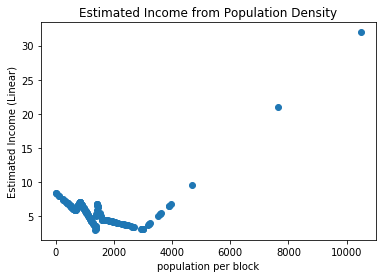

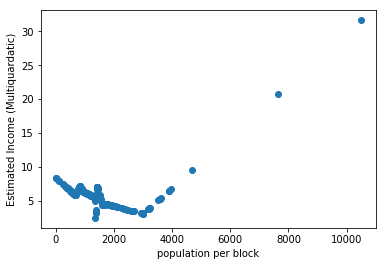

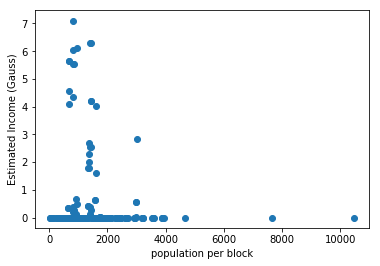

In [40]:
plt.scatter(data_train[:,1], data_train[:,2])
plt.xlabel('population per block') 
plt.ylabel('Income')
plt.title('Population training data')
plt.show()

plt.scatter(data_test[:,1], data_test[:,2])
plt.xlabel('population per block') 
plt.ylabel('True Income')
plt.title('Population testing data')
plt.show()

plt.scatter(data_test[:,1], y_hats_test_linear)
plt.xlabel('population per block') 
plt.ylabel('Estimated Income (Linear)')
plt.title('Estimated Income from Population Density')
plt.show()

plt.scatter(data_test[:,1], y_hats_test_multiquad)
plt.xlabel('population per block') 
plt.ylabel('Estimated Income (Multiquardatic)')
plt.show()

plt.scatter(data_test[:,1], y_hats_test_gauss)
plt.xlabel('population per block') 
plt.ylabel('Estimated Income (Gauss)')
plt.show()




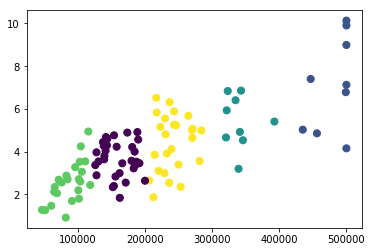

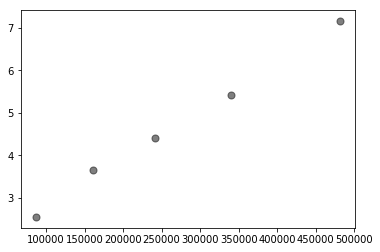

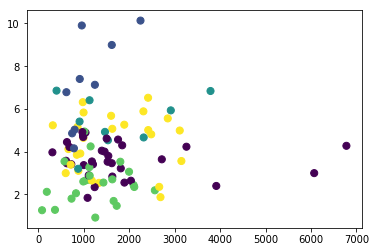

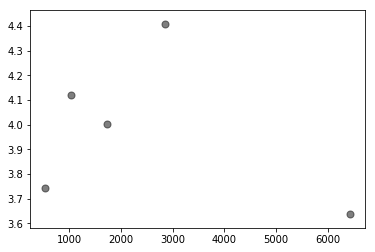

In [9]:
from sklearn.cluster import KMeans
#numTarg = 5
numTarg = int(len(x1train)/20)



x1trainLess = KMeans(n_clusters=numTarg, init='random').fit(data_train[:,[0,2]])
y_kmeans1 = x1trainLess.predict(data_train[:,[0,2]])

x2trainLess = KMeans(n_clusters=numTarg, init='random').fit(data_train[:,[1,2]])
y_kmeans2 = x1trainLess.predict(data_train[:,[1,2]])

plt.scatter(data_train[:,0], data_train[:,2], c = y_kmeans1, s=50, cmap='viridis')
centers1 = x1trainLess.cluster_centers_
plt.show()

plt.scatter(centers1[:, 0], centers1[:, 1], c='black', s=50, alpha=0.5);
plt.show()

plt.scatter(data_train[:,1], data_train[:,2], c = y_kmeans1, s=50, cmap='viridis')
centers2 = x2trainLess.cluster_centers_
plt.show()

plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=50, alpha=0.5);
plt.show()




In [31]:
tottrainLess = KMeans(n_clusters=numTarg, init='random').fit(data_train)
y_kmeanstot = tottrainLess.predict(data_train)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs,ys,zs,c = y_kmeanstot,cmap='viridis')
plt.show()

centerstot = tottrainLess.cluster_centers_

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(centerstot[:,0],centerstot[:,1],centerstot[:,2],c = 'blac')
plt.show()



NameError: name 'KMeans' is not defined